In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [3]:
file_encoding = 'cp1252'        # set file_encoding to the file encoding (utf8, latin1, etc.)
df=pd.read_csv('C:/Users/96659/Desktop/NLP project/Disney.csv', encoding=file_encoding)
#df=pd.read_csv('C:/Users/96659/Desktop/NLP project/Disney.csv' ,encoding='utf-8')

In [4]:
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [5]:
df.isna().sum()

Review_ID            0
Rating               0
Year_Month           0
Reviewer_Location    0
Review_Text          0
Branch               0
dtype: int64

In [25]:
branch_rating = df.groupby(['Branch']).Rating.mean()

In [94]:
df.groupby(['Branch']).Rating.mean()

Branch
Disneyland_California    4.405339
Disneyland_HongKong      4.204158
Disneyland_Paris         3.960088
Name: Rating, dtype: float64

<ipython-input-136-8df2a48c0428>:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(branch_rating)


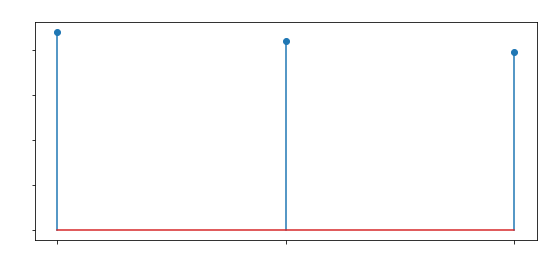

In [136]:
plt.stem(branch_rating)
positions = (0, 1, 2)
labels = ("California", "Hong Kong", "Paris")
plt.title('Branches Rating',c='w')
plt.xticks(positions, labels , c='w')
plt.yticks(c='w')
plt.xlabel('City',c='w')
plt.ylabel('Rating',c='w');

In [121]:
RL=df.Reviewer_Location.value_counts()
RL.head(7)

United States     14551
United Kingdom     9751
Australia          4679
Canada             2235
India              1511
Philippines        1070
Singapore          1037
Name: Reviewer_Location, dtype: int64

In [123]:
# import the library
import folium

# Make an empty map
m = folium.Map(location=[30,30], tiles="OpenStreetMap", zoom_start=2)

# Show the map
m

In [124]:
# Import the pandas library
import pandas as pd
#42.182658546007474, -102.2567967691331
#22.143516666449848, 80.14724805664186
#57.91301751988485, -103.45626735097812
#54.63653348999556, -2.4962108578941677
#-24.800835057179228, 133.50171672274965
#13.358455100958523, 120.41751669859659
#1.3599888459559526, 103.85799486200072
# Make a data frame with dots to show on the map
data = pd.DataFrame({
   'lon':[-102.2567967691331, -2.4962108578941677, 133.50171672274965, -103.45626735097812, 80.14724805664186,120.41751669859659,103.85799486200072],
   'lat':[42.182658546007474, 54.63653348999556,-24.800835057179228, 57.91301751988485, 22.143516666449848,13.358455100958523,1.3599888459559526],
   'name':['United States', 'United Kingdom', 'Australia', 'Canada' ,'India','Philippines','Singapore'],
   'value':[50, 45, 40, 30, 20,10,7]
}, dtype=str)

data

,lon,lat,name,value
0,-102.2567967691331,42.182658546007474,United States,50
1,-2.4962108578941677,54.63653348999556,United Kingdom,45
2,133.50171672274965,-24.800835057179228,Australia,40
3,-103.45626735097812,57.91301751988485,Canada,30
4,80.14724805664186,22.143516666449848,India,20
5,120.41751669859659,13.358455100958523,Philippines,10
6,103.85799486200072,1.3599888459559526,Singapore,7


In [125]:
# add marker one by one on the map
for i in range(0,len(data)):
   folium.Circle(
      location=[data.iloc[i]['lat'], data.iloc[i]['lon']],
      popup=data.iloc[i]['name'],
      radius=float(data.iloc[i]['value'])*20000,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)

# Show the map again
m

In [132]:
text=" ".join(df["Review_Text"])

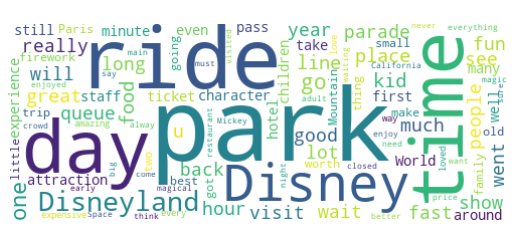

In [134]:
# Write the most reapted word in artist_name column
plt.rcParams['figure.figsize'] =9, 4
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white",width=500, height=200,collocations=False).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("The most repeted words in the reviews",c='w')
plt.show();

In [138]:
text1 = " ".join(title for title in df.Review_Text)

In [153]:
word_cloud1 = WordCloud(collocations = False, background_color = 'white',
                        width = 4000, height = 2000).generate(text1)
# saving the image
word_cloud1.to_file('got.png')

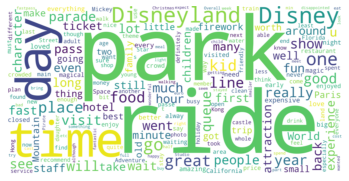

In [154]:
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

In [155]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

In [156]:
text2 = open('C:/Users/96659/Downloads/text2.txt', 'r').read()

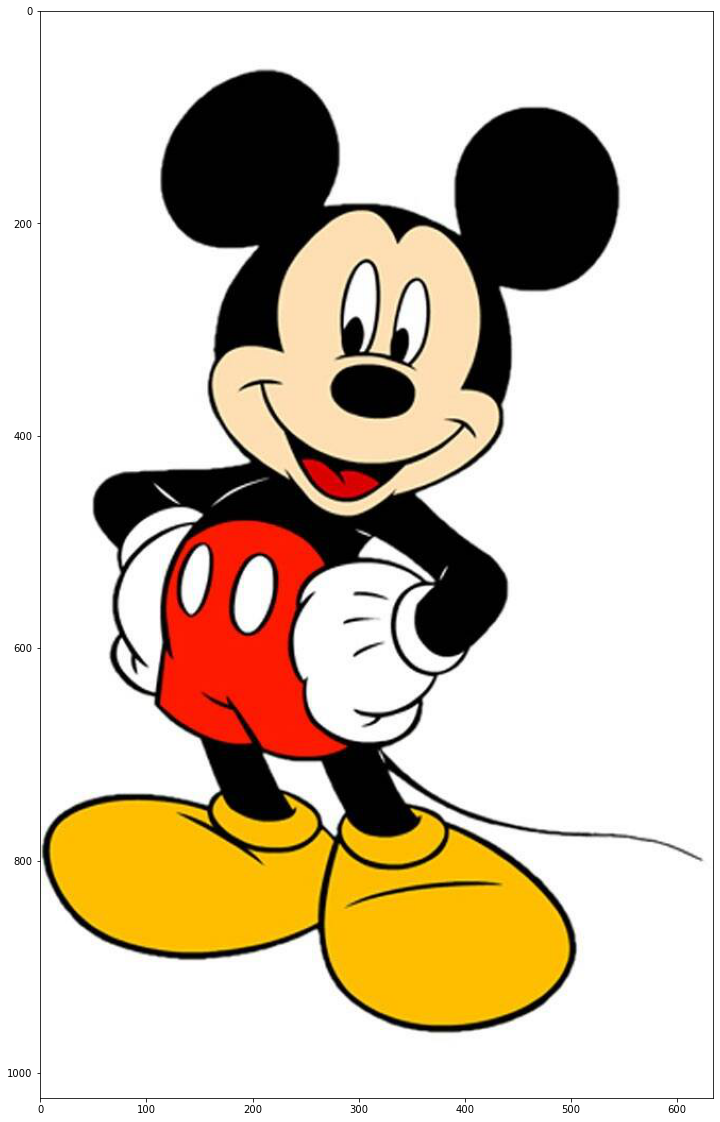

In [187]:
background_image = np.array(Image.open('C:/Users/96659/Downloads/mm.jpg'))
plt.imshow(background_image)
plt.rcParams["figure.figsize"] = (30,20)

In [188]:
# Creating word_cloud with text as argument in .generate() method
word_cloud2 = WordCloud(background_color = 'white',mask = background_image, 
               width = 2048, height = 1080).generate(text2)

# font color matching the masked image
img_colors = ImageColorGenerator(background_image)
word_cloud2.recolor(color_func = img_colors)

#saving the image
word_cloud2.to_file('disney.png')

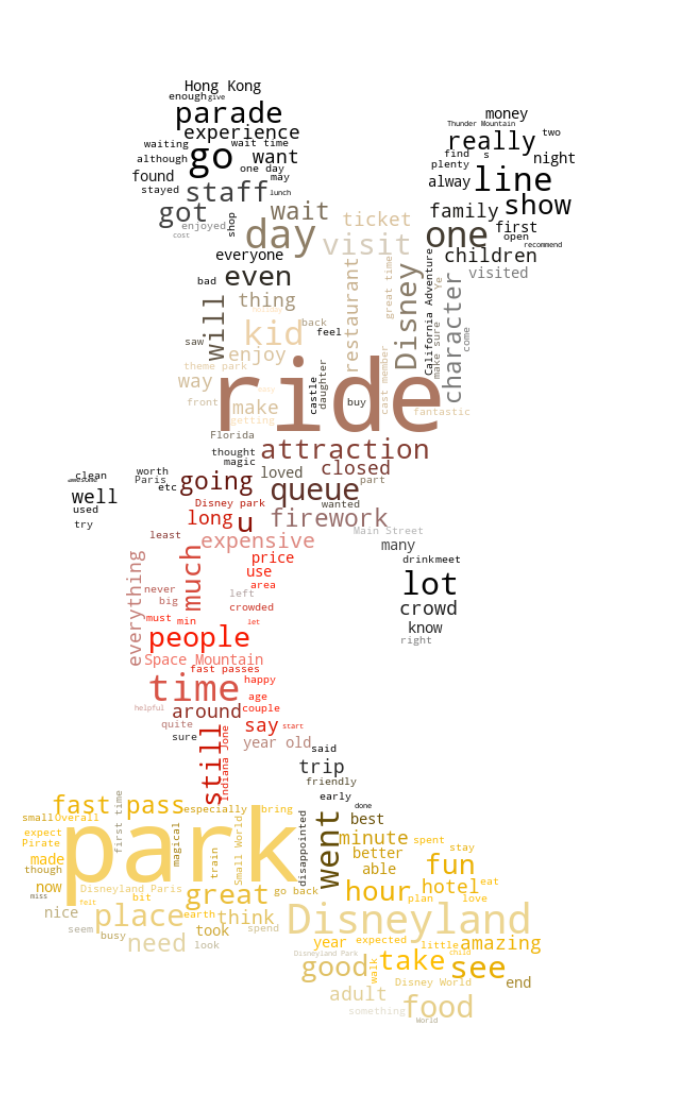

In [190]:
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.rcParams["figure.figsize"] = (100,20)


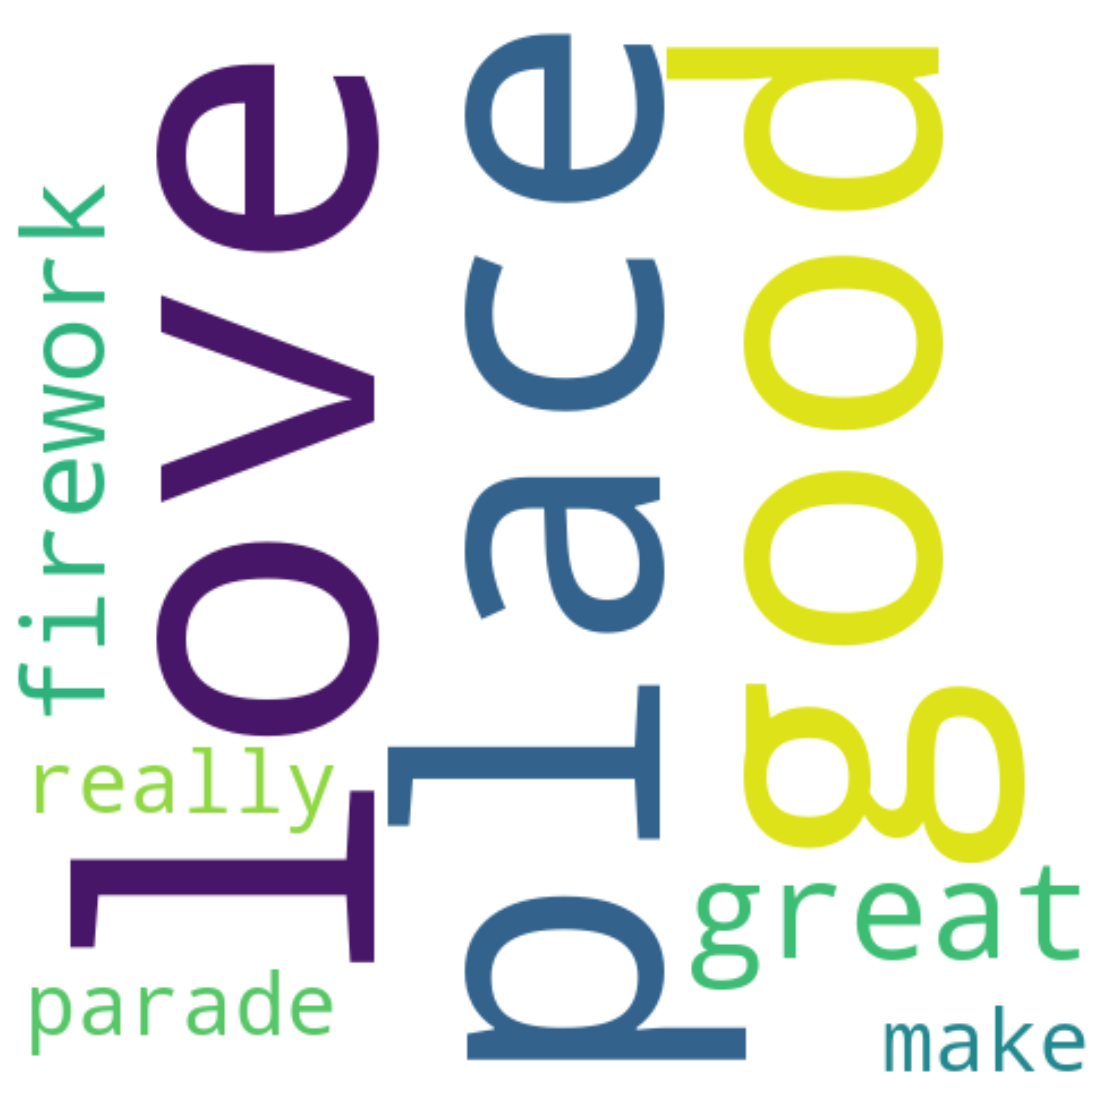

In [193]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a list of word
text=("just parade place place place place great great great love love love love love make good good good good really like like like like firework firework")

# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0,background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

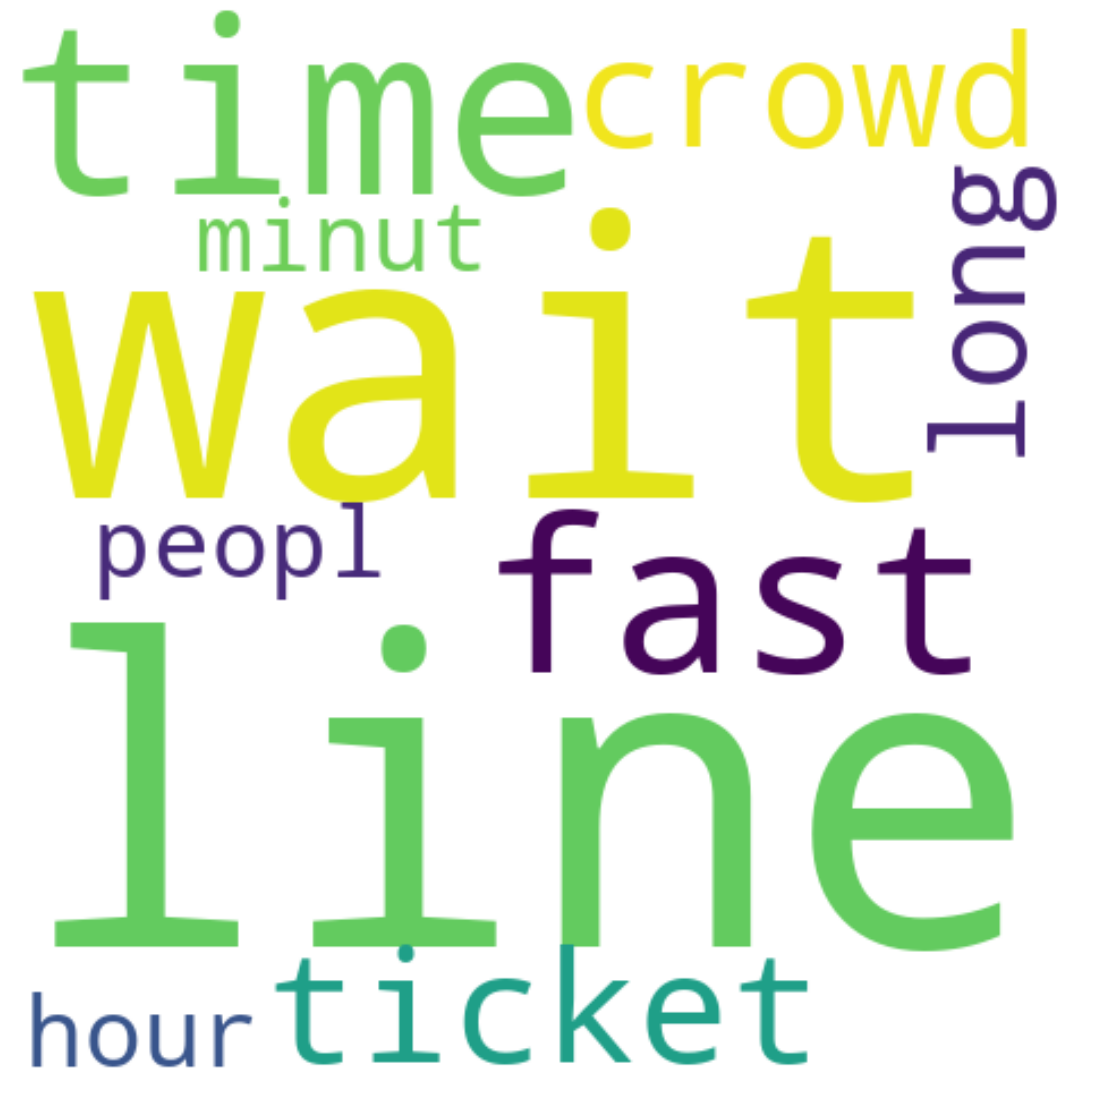

In [192]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a list of word
text=("line line line line line wait wait wait wait long long fast fast fast peopl hour minut ticket ticket ticket crowd crowd crowd time time time time")

# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0,background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()